<a href="https://colab.research.google.com/github/sinhasagar507/CSE572_Portfolio/blob/saggyDev/1_0_sinhasagar507_hate_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
# This Python script begins with a try-except block to handle potential import errors.

try:
    # The script attempts to import the 'convokit' and 'detoxify' modules.
    import convokit
    import detoxify
    import re
    import pandas as pd
    from tqdm import tqdm
    tqdm.pandas()
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from transformers import pipeline
    from convokit import Corpus, download
except ModuleNotFoundError:
    # If the modules are not found (i.e., they are not installed), a ModuleNotFoundError is raised.
    # The except block catches this error and executes the following commands.

    # The 'pip install' command is used to install the missing modules.
    # The '!' at the beginning of the command is a Jupyter Notebook specific syntax that allows shell commands to be run from within the notebook.
    !pip install convokit
    !pip install detoxify
    # After these commands are executed, the 'convokit' and 'detoxify' modules should be installed, and the script can be run again.

In [ ]:
corpus = Corpus(filename=download("subreddit-formula1"))

No configuration file found at /root/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
default_backend: mem


In [ ]:
corpus.get_utterances_dataframe()

NameError: name 'corpus' is not defined

In [ ]:
# Download the corpora over here
corpus = Corpus(filename=download("subreddit-PussyPass"))
utterances_df = corpus.get_utterances_dataframe()
utterances_df.shape

(100094, 15)

In [ ]:
# Load the Convokit corpus
import json

def extract_keys_from_json(file_path):
    # Initialize an empty list to store the keys
    keys = []

    try:
        # Open and read the JSON file
        with open(file_path, 'r') as f:
            data = json.load(f)

        # Extract the keys and append them to the list
        keys = list(data.keys())

    except FileNotFoundError:
        print(f"The file {file_path} does not exist.")
    except json.JSONDecodeError:
        print(f"There was an error decoding the JSON from the file {file_path}.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

    return keys

# Use the function
file_path = '/content/drive/MyDrive/572_project/The_Donald.corpus/conversations.json'
keys = extract_keys_from_json(file_path)
print(keys)

Exception ignored in: <function _xla_gc_callback at 0x7ee01a472b00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x7ee01a472b00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x7ee01a472b00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Curren

In [ ]:
# Just try reading the "conversations.JSONL" and "utterances.JSONL" file
conv_df = pd.read_json("/content/drive/MyDrive/572_project/subreddit-PussyPass/conversations.json", lines=True)
conv_df = conv_df.T

In [ ]:
import json

In [ ]:
conv_df.columns = ["dict_values"]

In [ ]:
conv_df["dict_values"]

1dkp6y    {'title': 'Police say girl's story about Conco...
1dns6z    {'title': 'Pussy Pass...DENIED!', 'num_comment...
1e31hx    {'title': 'Woman hires hitman to kill husband,...
1em14n    {'title': 'Pregnant wife gets four months for ...
5wrkc3    {'title': 'Higher Education Publication Publis...
                                ...                        
9avq0x    {'title': 'Preschool director admits she pulle...
9awd46    {'title': 'Former school employee sentenced to...
9b3yhe    {'title': 'Judge accepts serial child rapist t...
9beokf    {'title': 'Women assume man pays check-going t...
9bm9dw    {'title': 'Woman arrested and charged with rap...
Name: dict_values, Length: 8253, dtype: object

In [ ]:
expanded_conv_df = conv_df["dict_values"].apply(pd.Series)

In [ ]:
expanded_conv_df = expanded_conv_df[(expanded_conv_df["num_comments"] >= 5) & (expanded_conv_df["num_comments"] <= 10)]
expanded_conv_idx_lst = list(expanded_conv_df.index)[:1000]

In [ ]:
len(expanded_conv_idx_lst)

1000

In [ ]:
# Check the conv_df once more for index
expanded_conv_df

,title,num_comments,domain,timestamp,subreddit,gilded,gildings,stickied,author_flair_text
5ws6jn,Princeton Group Bans Star Wars Costume: Stormt...,5,thegatewaypundit.com,1488332368,PussyPass,0,None,False,
5wst6q,"""The blood thirsty Jewish terrorists have murd...",7,imgflip.com,1488339228,PussyPass,0,None,False,
5wzdvw,"""Any future cashless bank-payments society wil...",5,aeon.co,1488408733,PussyPass,0,None,False,
5wzvvl,"STOP THE DESTRUCTION OF ENDANGERED SPECIES, NOW!",6,imgflip.com,1488413893,PussyPass,0,None,False,
5x021r,"It's better to be struck by a nuclear-bomb, th...",5,imgflip.com,1488415784,PussyPass,0,None,False,
...,...,...,...,...,...,...,...,...,...
9a2svl,ESPN host Michelle Beadle admits she doesn't w...,5,thewrap.com,1535157962,PussyPass,0,None,False,
9a3w1q,Former Plano teacher gets probation for relati...,5,fox4news.com,1535168173,PussyPass,0,None,False,
9ac5p9,Woman is jailed for 2 years for destroying her...,9,theviolinchannel.com,1535248942,PussyPass,0,None,False,
9ah73o,Middle aged woman habitually flashes food deli...,10,reddit.com,1535303929,PussyPass,0,None,False,


In [ ]:
# Check the utterances dataframe
# utterances_df = pd.read_json("/content/drive/MyDrive/572_project/thedonald.corpus/utterances.jsonl", lines=True)
# utterances_df = utterances_df.set_index("id")
utterances_df = utterances_df[utterances_df["conversation_id"].isin(expanded_conv_idx_lst)]

In [ ]:
# Check the integrity of the corpus
# try:
#     corpus.check_integrity(verbose=True)
#     print("Corpus integrity check passed.")
# except Exception as e:
#     print("Corpus integrity check failed:", e)

Corpus integrity check failed: 'Corpus' object has no attribute 'check_integrity'


In [ ]:
# def get_invalid_conversation_ids(corpus):
#     # Get all conversation ids
#     conversation_ids = corpus.get_conversation_ids()

#     invalid_ids = []

#     # Iterate over all conversation ids
#     for id in conversation_ids:
#         # Get the conversation
#         conversation = corpus.get_conversation(id)

#         # Check the integrity of the conversation
#         if not conversation.check_integrity(verbose=False):
#             # If the check fails, add the id to the list of invalid ids
#             invalid_ids.append(id)

#     return invalid_ids

In [ ]:
# invalid_ids = get_invalid_conversation_ids(corpus)
# print("Invalid conversation IDs:", invalid_ids)

Invalid conversation IDs: []


In [ ]:
# Load the corpus
# path = "/content/drive/MyDrive/572_project/subreddit-PussyPass"
# hs_sample_corpus = Corpus(filename=path)
# hs_utterances_df = hs_sample_corpus.get_utterances_dataframe()

In [ ]:
# Clean Reddit function
def cleanReddit(
        text_reddit, newline=True, quote=True,
        bullet_point=True, dates=True, link=True,
        strikethrough=True, spoiler=True, heading=True,
        emoj=True, emoticon=True, condensed=True):
    # Newlines we don't need - only
    """ Cleans reddit utterances"""

    if newline:
        text_reddit = re.sub(r'\n+', ' ', text_reddit)
        # Remove the many " " that we replaced in the last step
        text_reddit = text_reddit.strip()
        text_reddit = re.sub(r'\s\s+', ' ', text_reddit)

    # > are for the quoted texts from the main comment or the reply
    if quote:
        text_reddit = re.sub(r'>', '', text_reddit)

    # Bullet points/asterisk are used for markdown like - bold/italic - Could create trouble in parsing? idk
    if bullet_point:
        text_reddit = re.sub(r'\*', '', text_reddit)
        text_reddit = re.sub('&amp;#x200B;', '', text_reddit)

    # []() Link format then we remove both the tag/placeholder and the link
    if link:
        text_reddit = re.sub(r"http\S+", '', text_reddit)
        text_reddit = re.sub(r'\[.*?\]\(.*?\)', '', text_reddit)

    # Strikethrough
    if strikethrough:
        text_reddit = re.sub('~', '', text_reddit)

    # Spoiler, which is used with < less-than (Preserves the text)
    if spoiler:
        text_reddit = re.sub('&lt;', '', text_reddit)
        text_reddit = re.sub(r'!(.*?)!', r'\1', text_reddit)

    # Heading to be removed as there are these markdown style features in reddit too
    if heading:
        text_reddit = re.sub('#', '', text_reddit)

    if emoj:
        # Implement the emoji scheme here
        # Implementing a Naive Emoji Scheme
        # Some associated libraries are EMOT and DEMOJI
        # text_reddit = emoji.demojize(text_reddit).replace(":", "").replace("_", "")
        # Makes more sense for the node feature but might as well import that function here if ready
        pass

    if dates:
        text_reddit = re.sub(r'(\d+/\d+/\d+)', '', text_reddit)

    if emoticon:
        # Implement the emoticon scheme here.
        # Makes more sense for the node feature but might as well import that function here if ready
        pass

    # Needs to be the last step in the process
    # if contractions:
    # text = contractions.fix(text)
    # print("Running")
    return text_reddit

In [ ]:
# Load the speakers data from the sample corpus and store it in a dataframe
# speakers_df = corpus.get_speakers_dataframe()
# speakers_df

,vectors
id,
funkypandaz,[]
GameofBloodlines,[]
TheEconomist777,[]
VeryKodak,[]
SelfMadeAlphaMale,[]
...,...
FutureSquall,[]
-TastyMuffin-,[]
ThePeanut_KJD,[]


In [ ]:
# Get the conversations data from the sample corpus and store it in a DataFrame
# conversations_df = corpus.get_conversations_dataframe()
# conversations_df.head()

,vectors,meta.title,meta.num_comments,meta.domain,meta.timestamp,meta.subreddit,meta.gilded,meta.gildings,meta.stickied,meta.author_flair_text
id,,,,,,,,,,
6xf6xi,[],Indian men need to catch upto the MGTOW movement,15,self.MGTOW2,1504279149,MGTOW2,0,None,False,
6y4ccc,[],TRUTH,0,self.MGTOW2,1504571031,MGTOW2,0,None,False,
6y9vd7,[],Any Metal MGTOW fans?,4,self.MGTOW2,1504635530,MGTOW2,0,None,False,
6ydkmv,[],ONE WAY,1,self.MGTOW2,1504673923,MGTOW2,0,None,False,
6ydl4m,[],MGTOW &amp; Vacations,16,self.MGTOW2,1504674088,MGTOW2,0,None,False,


In [ ]:
# Check the utterances dataframe
# utterances_df = corpus.get_utterances_dataframe()
# utterances_df.shape

(11090, 15)

In [ ]:
# Load other corpora's CSV file and append the current dataframe to it
# prev_corpora_sample = pd.read_csv("/content/drive/MyDrive/572_project/corpora/pussy_pass_500_999.csv")
# prev_corpora_sample

In [ ]:
# Get the index of the first 500 conversations from the corpus
# conv_indexes_sample = corpus.get_conversations_dataframe().index[0:1000]

# Filter the dataframe to only include rows where the conversation_id is in the list of sampled conversation indexes
# corpus_sample_df = utterances_df[utterances_df["conversation_id"].isin(conv_indexes_sample)]

# Append to the existing dataframe
# corpus_sample_df = pd.concat([utterances_df, corpus_sample_df], ignore_index=True)

In [ ]:
utterances_df["meta"]["4d05u2"]

{'score': 0,
 'top_level_comment': None,
 'retrieved_on': 1463515058,
 'gilded': 0,
 'gildings': None,
 'subreddit': 'thedonald',
 'stickied': False,
 'permalink': '/r/thedonald/comments/4d05u2/why_shouldnt_both_the_woman_and_person_doing_the/',
 'author_flair_text': ''}

In [ ]:
# Drop the unrequired columns dataframe
# utterances_df = utterances_df.drop(["meta"], axis=1)

In [ ]:
# Now drop all the unrequired feature columns
# corpus_sample_df = corpus_sample_df.drop(columns=[
#                                         "meta.score", "meta.top_level_comment", "meta.retrieved_on",
#                                         "meta.gilded", "meta.gildings", "meta.author_flair_text", "meta.stickied", "vectors"
#                                   ], axis=1)

In [ ]:
len(utterances_df[(utterances_df["text"] != "None") & (utterances_df["text"] != "[deleted]")])

8096

In [ ]:
# Clean the function using the helper code
utterances_df["clean_text"] = utterances_df["text"].progress_apply(cleanReddit)

100%|██████████| 8647/8647 [00:00<00:00, 23044.89it/s]


In [ ]:
# Fill NaN with "Null" values
utterances_df = utterances_df.fillna("None")

In [ ]:
# Import the Detoxify module. Detoxify is a Python library for training and using text toxicity classification models.
from detoxify import Detoxify

# Initialize the Detoxify model. The "original" model is one of the pre-trained models provided by the Detoxify library.
model = Detoxify("original")

Downloading: "https://github.com/unitaryai/detoxify/releases/download/v0.1-alpha/toxic_original-c1212f89.ckpt" to /root/.cache/torch/hub/checkpoints/toxic_original-c1212f89.ckpt
100%|██████████| 418M/418M [00:03<00:00, 135MB/s] 
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# TODO: Remove this line later, cause I would have processed everything and then its not needed
# corpus_sample_df = pd.read_csv("/content/drive/MyDrive/572_project/corpora/intermediate /mgtow2_intro.csv")
# corpus_sample_df.shape

(8331, 17)

In [ ]:
# corpus_sample_df.isnull().sum()

timestamp                    0
text                       259
speaker                      0
reply_to                  1000
conversation_id              0
meta.score                   0
meta.top_level_comment    1001
meta.retrieved_on            0
meta.gilded                  0
meta.gildings             5742
meta.subreddit               0
meta.stickied                0
meta.permalink             664
meta.author_flair_text    8331
vectors                      0
clean_text                 274
hs_scores                    0
dtype: int64

In [ ]:
# Apply the clean function
# corpus_sample_df["clean_text"] = corpus_sample_df["text"].progress_apply(cleanReddit)

100%|██████████| 8331/8331 [00:01<00:00, 7312.83it/s]


In [ ]:
# Calculate the cumulative toxicity, severe_toxicity and other related aspects of the Perspective API over here
utterances_df["hs_scores"] = utterances_df["clean_text"].progress_apply(lambda x: model.predict(x))

 92%|█████████▏| 7979/8647 [22:28<02:23,  4.65it/s]

In [ ]:
utterances_df["hs_scores"].isnull().sum()

0

In [ ]:
# corpus_sample_df = corpus_sample_df.fillna("None")
# Create a reference corpus to test if everything is fine
# sample_corpus = Corpus.from_pandas(corpus_sample_df)

ID column is not present in utterances dataframe, generated ID column from dataframe index...


8331it [00:01, 6287.40it/s]


In [ ]:
# Take out the remaining rows AND process on the rest of data
# corpus_sample_subsample = corpus_sample_df.loc[8331: ]
# corpus_sample_subsample

,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,meta.subreddit,meta.stickied,meta.permalink,meta.author_flair_text,vectors,clean_text,hs_scores


In [ ]:
# corpus_sample_df.to_csv("/content/drive/MyDrive/572_project/corpora/intermediate /mgtow2_intro.csv", index=False)

In [ ]:
utterances_df["toxicity"] = utterances_df["hs_scores"].apply(lambda x: x["toxicity"])
utterances_df["severe_toxicity"] = utterances_df["hs_scores"].apply(lambda x: x["severe_toxicity"])
utterances_df["obscene"] = utterances_df["hs_scores"].apply(lambda x: x["obscene"])
utterances_df["threat"] = utterances_df["hs_scores"].apply(lambda x: x["threat"])
utterances_df["insult"] = utterances_df["hs_scores"].apply(lambda x: x["insult"])
utterances_df["identity_attack"] = utterances_df["hs_scores"].apply(lambda x: x["identity_attack"])

In [ ]:
# path = "/content/drive/MyDrive/572_project/sample_features_hs_1.csv"
# corpus_sample_df.to_csv(path, index=False)
# corpus_sample_df = pd.read_csv(path)

In [ ]:
# Now drop all the unrequired feature columns
# hs_sample_df = hs_sample_df.drop(columns=[
#                                         "meta.score", "meta.top_level_comment", "meta.retrieved_on",
#                                         "meta.gilded", "meta.gildings", "meta.author_flair_text", "meta.stickied", "vectors"
#                                   ], axis=1)

In [ ]:
# Assume this is the sample dataframe
utterances_df = utterances_df.fillna("None")
fs_analysis_set = utterances_df[["toxicity", "severe_toxicity", "obscene", "threat", "insult", "identity_attack"]]

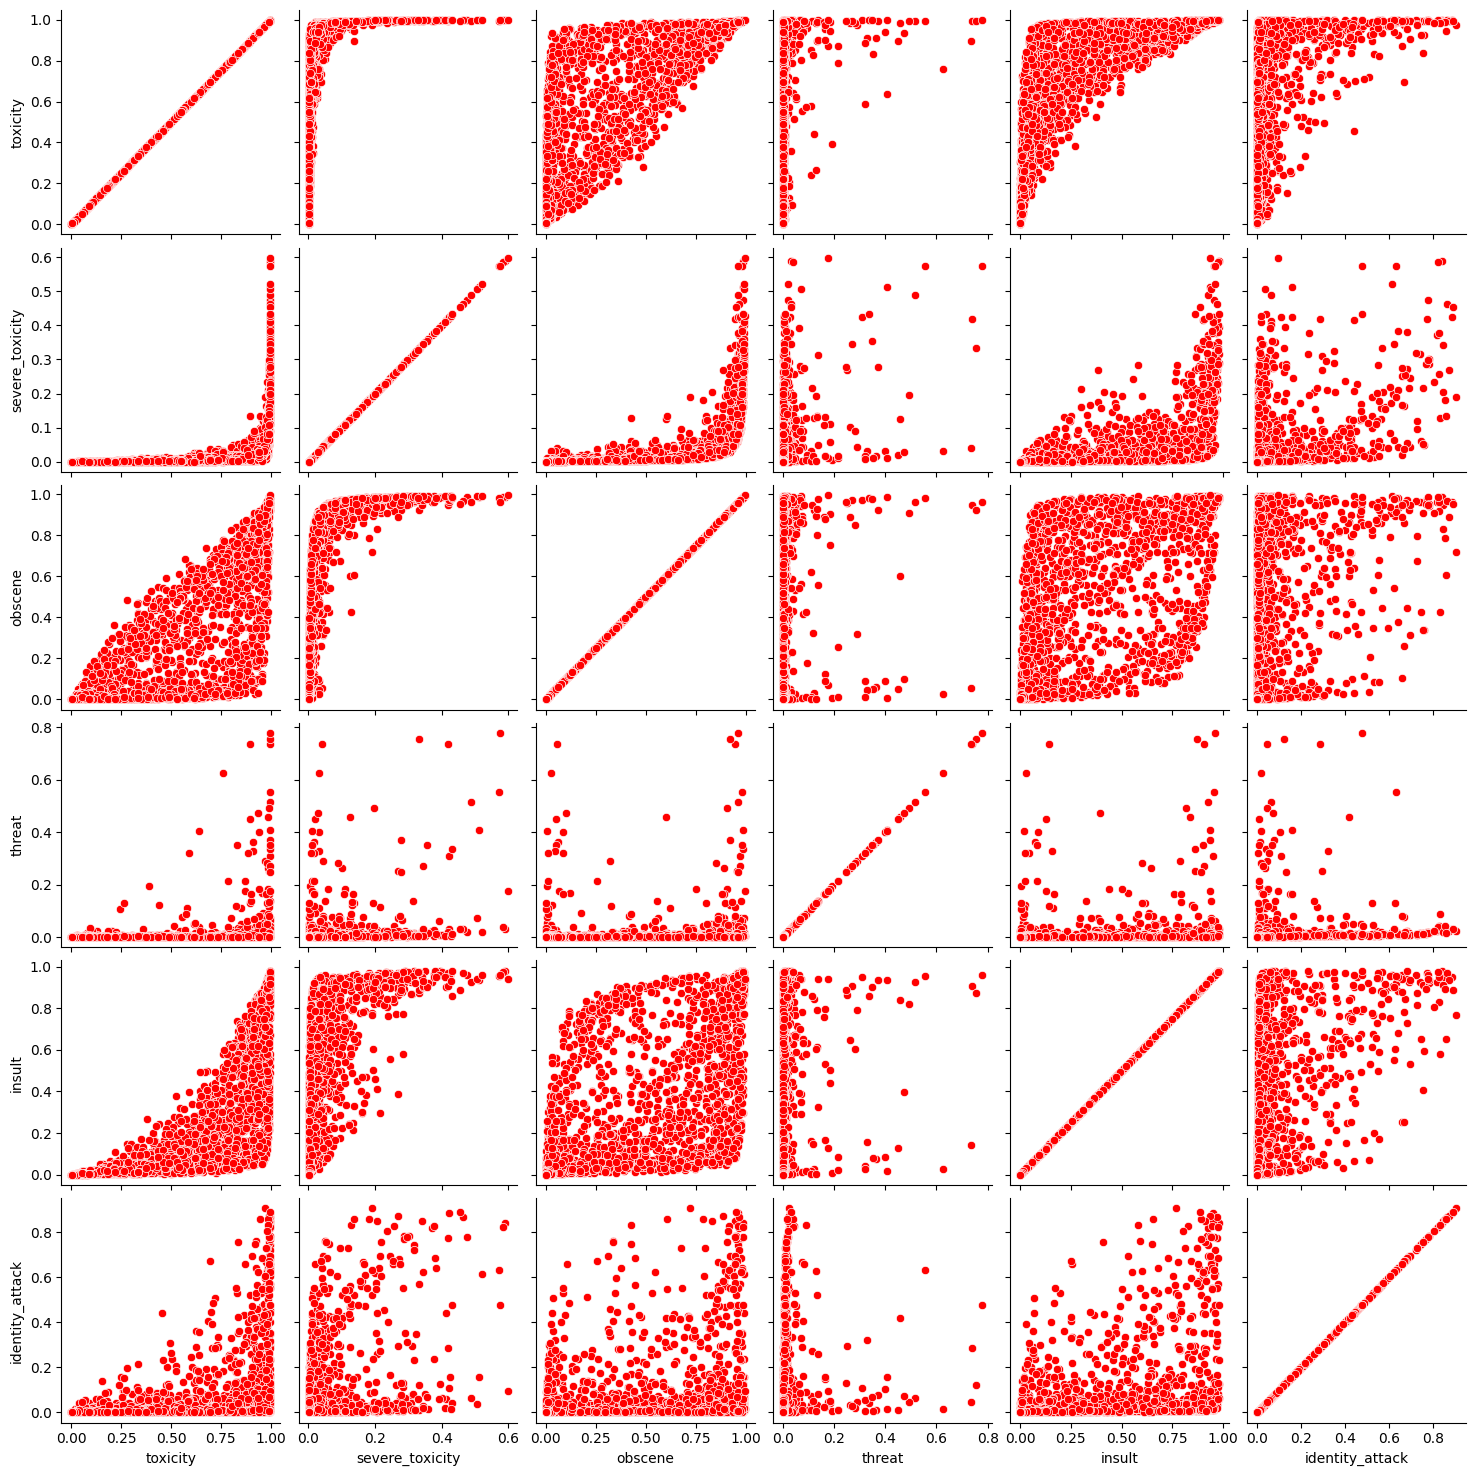

In [ ]:
# The seaborn library's pairplot function is used to create a grid of Axes such that each variable in your data
# will be shared across the y-axes across a single row and the x-axes across a single column.
# The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution
# of the data in each column.

# 'fs_analysis_set' is the dataset for which the pairplot is being created.

# 'plot_kws' is a dictionary of keyword arguments that are passed to the underlying plotting functions
# used to generate the off-diagonal subplots in the pairplot. Here, it's used to set the color of the plots to red.

# 'diag_kind' sets the kind of plot for the diagonal subplots in the pairplot. The default is 'auto',
# but it can be set to 'hist', 'kde', or None. If None, no plot is drawn on the diagonal subplots.

sns.pairplot(fs_analysis_set, plot_kws={'color':'red'}, diag_kind=None)

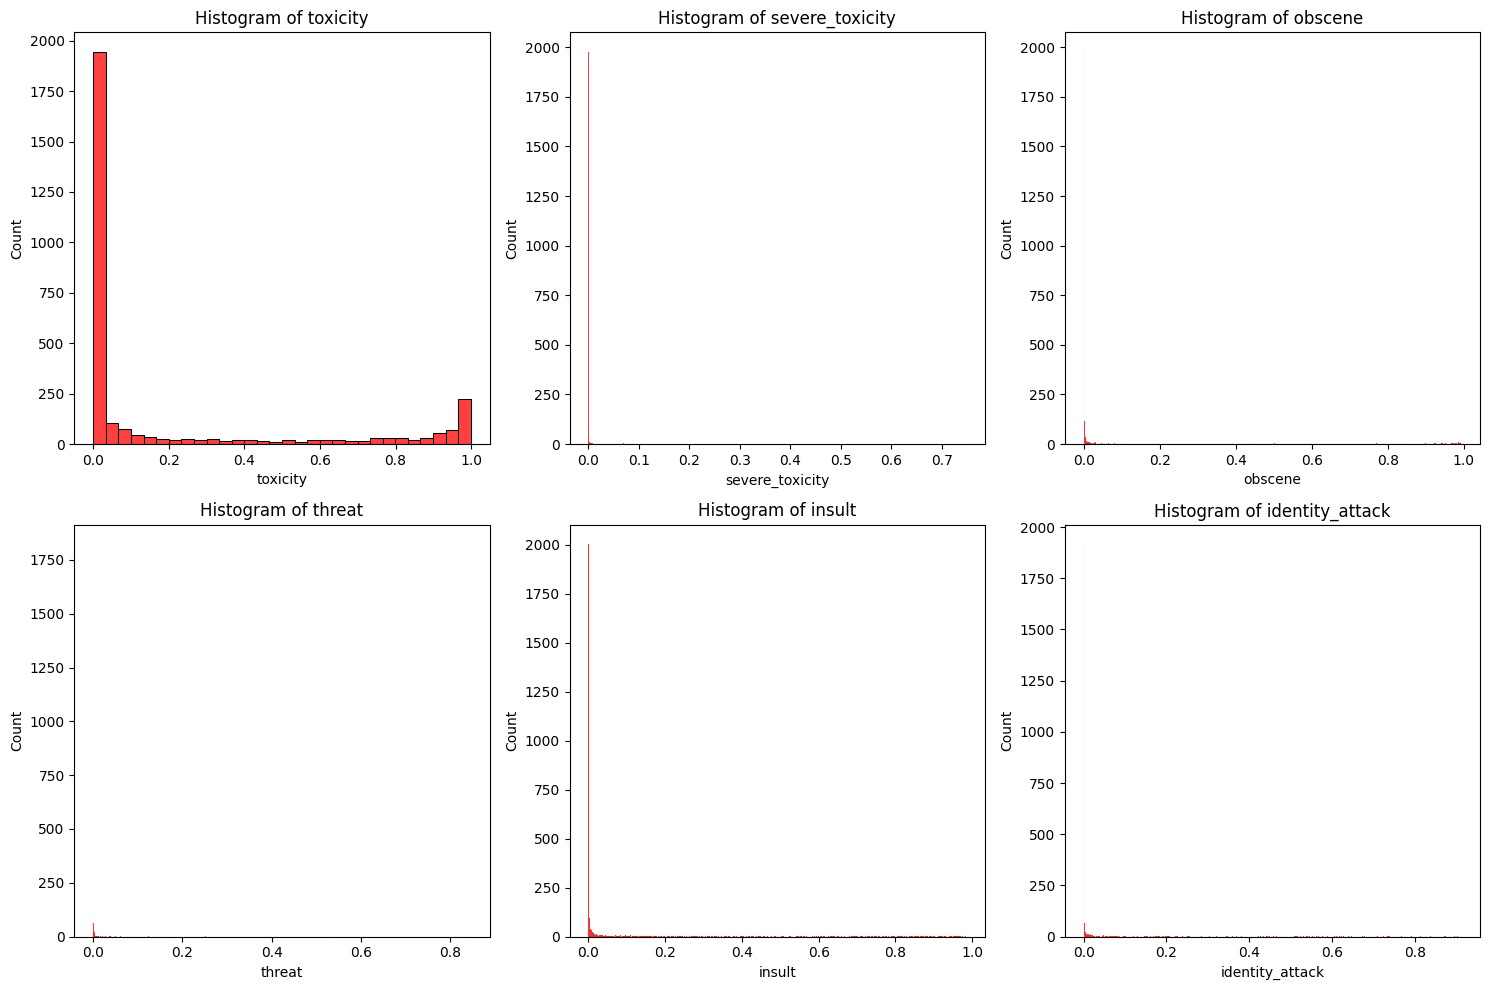

In [ ]:
# Individual analysis
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the array of axes
axs = axs.flatten()

# Plot a histogram on each subplot
for i, col in enumerate(fs_analysis_set.columns):
    sns.histplot(data=fs_analysis_set, x=col, color='red', ax=axs[i])
    axs[i].set_title(f'Histogram of {col}')

# Adjust the layout
plt.tight_layout()
plt.show()

<Axes: xlabel='toxicity', ylabel='Count'>

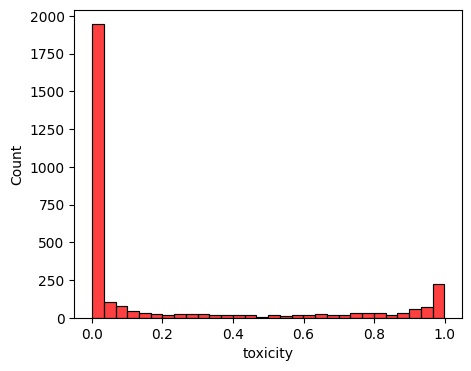

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(data=fs_analysis_set, x="toxicity", color='red')

<Axes: xlabel='toxicity', ylabel='obscene'>

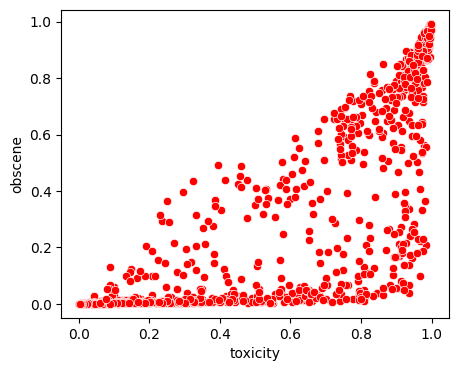

In [ ]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=fs_analysis_set, x="toxicity", y="obscene", color='red')

**Rough Observation(s) and Analysis**
- Pura Analysis Daaldo
- Jo general analysis values nikl ke aa rhi hain plot se they are useful to us
- Remove all the necessary variables

In [ ]:
fs_analysis_set.describe()

,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
count,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000
mean,0.205639,0.019073,0.126677,0.006003,0.094713,0.049240
std,0.348506,0.073305,0.288871,0.047175,0.231256,0.148671
min,0.000509,0.000082,0.000145,0.000081,0.000165,0.000119
25%,0.000912,0.000109,0.000184,0.000113,0.000184,0.000146
50%,0.002522,0.000118,0.000238,0.000128,0.000246,0.000188
75%,0.245956,0.001220,0.008428,0.001114,0.013385,0.005118
max,0.999012,0.747391,0.992873,0.845918,0.983893,0.911345


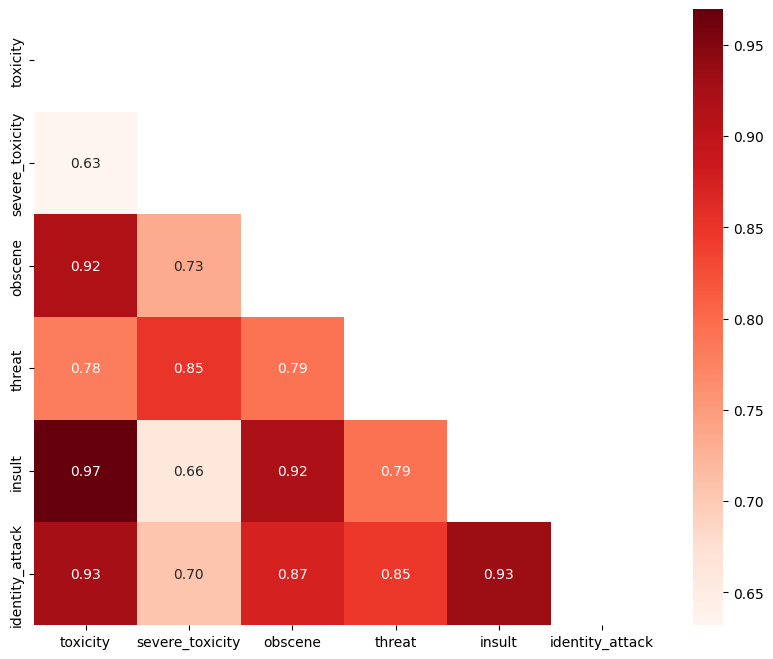

In [ ]:
## The below drawn correlation plot is a fluke. Don't believe it at all. Doesn't respect the distribution part
## No its not a fluke. And I can definitely use Spearmann's correlation values here
# Correlation matrix
corr_matrix = fs_analysis_set.corr(method='spearman')

# Generate upper masking
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Reds', cbar=True, mask=mask)
plt.show()

**Observation(s) and Analysis**
-

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.3 MB/s eta 0:00:00


In [ ]:
from textblob import TextBlob as tb
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sentiment = SentimentIntensityAnalyzer()

In [ ]:
import numpy as np

In [ ]:
def sentiment_analyzer(utt: str) -> dict:
    if pd.isnull(utt) or utt == "[deleted]" or utt == ' ':
        return 0

    sentence_ls = nltk.sent_tokenize(utt)
    compound_score_ls = []

    for sent in sentence_ls:
        sentiment_scores = sentiment.polarity_scores(sent)
        compound_score_ls.append(sentiment_scores["compound"])

    avg_compound_score = round(sum(compound_score_ls) / len(compound_score_ls), 3) if compound_score_ls else 0

    return avg_compound_score

In [ ]:
# hs_sample_df = hs_sample_df.drop(["compound_sentiment_scores", "sentiment_scores"], axis=1)

In [ ]:
utterances_df["sentiment_scores"] = utterances_df["clean_text"].progress_apply(lambda x: sentiment_analyzer(x))

100%|██████████| 8647/8647 [00:02<00:00, 2955.54it/s]


In [ ]:
utterances_df["sentiment_scores"].min()

-0.993

In [ ]:
# hs_sample_df["sentiment_scores"] = hs_sample_df["clean_text"].progress_apply(lambda x: sentiment_analyzer(x))

- Jahan pe text was "" vahan pe its NaN. Baad mein jo links nikala uske vajah se ' '

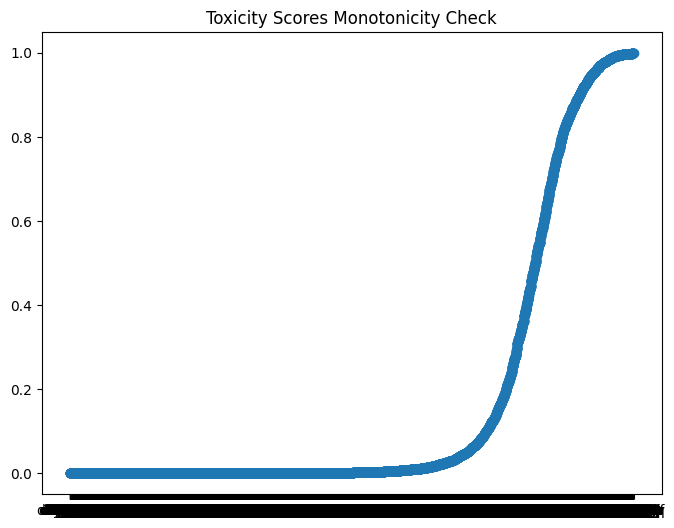

In [ ]:
# TODO: Make this plot red
# For above plots
## Sort dataframes by toxicity score
### Farce, jsut state about them
import matplotlib.pyplot as plt
df_toxicity_sorted = utterances_df.sort_values(by="toxicity")

# Plot the scores
plt.figure(figsize=(8, 6))
plt.plot(df_toxicity_sorted['toxicity'], marker='o')
plt.title('Toxicity Scores Monotonicity Check')
plt.show()

Text(0, 0.5, 'Frequency')

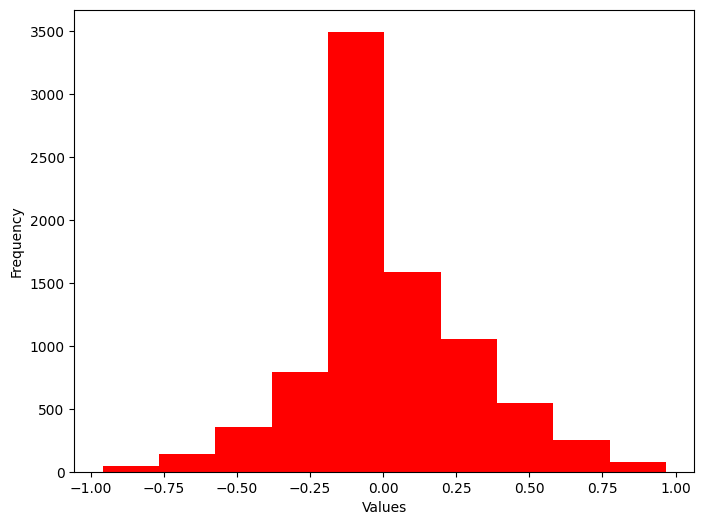

In [ ]:
## Plot the histogram of VADER sentiments
plt.figure(figsize=(8, 6))
plt.hist(df_toxicity_sorted['sentiment_scores'], color='red', bins=10)  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

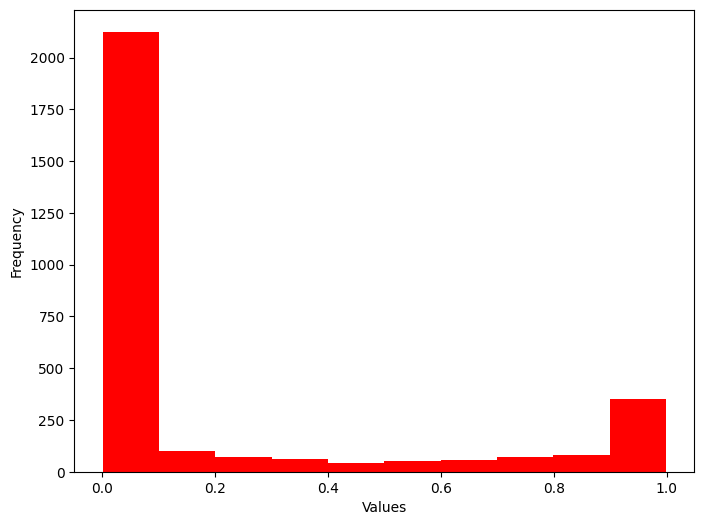

In [ ]:
## Plot the histogram of VADER sentiments
plt.figure(figsize=(8, 6))
plt.hist(df_toxicity_sorted['toxicity'], color='red', bins=10)  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')

In [ ]:
# Finally, discretize those values
utterances_df.describe()

,timestamp,meta.score,meta.retrieved_on,meta.gilded,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,sentiment_scores,sentiment_category
count,8.256000e+03,8256.000000,8.256000e+03,8256.000000,8256.000000,8256.000000,8256.000000,8256.000000,8256.000000,8256.000000,8256.000000,8256.000000
mean,1.504938e+09,6.493338,1.507118e+09,0.000363,0.179517,0.013520,0.101705,0.005027,0.083660,0.020196,0.504295,-0.271560
std,2.269759e+07,49.411811,2.276242e+07,0.019060,0.330600,0.062317,0.262615,0.042782,0.221142,0.095624,0.155786,0.444791
min,1.454517e+09,-121.000000,1.458339e+09,0.000000,0.000499,0.000079,0.000148,0.000083,0.000163,0.000124,0.012000,-1.000000
25%,1.485551e+09,1.000000,1.486530e+09,0.000000,0.000915,0.000107,0.000184,0.000113,0.000183,0.000144,0.455500,-1.000000
50%,1.507073e+09,2.000000,1.509284e+09,0.000000,0.002281,0.000115,0.000238,0.000124,0.000245,0.000183,0.500000,0.000000
75%,1.524631e+09,4.000000,1.526791e+09,0.000000,0.125310,0.000322,0.003140,0.000524,0.004883,0.001361,0.567500,0.000000
max,1.541029e+09,1823.000000,1.542775e+09,1.000000,0.999049,0.888710,0.994533,0.830613,0.986257,0.971067,0.993500,0.000000


In [ ]:
# Calculate the skewness and kurtosis of this distribution
import numpy as np
from scipy.stats import skew, kurtosis
skewness = skew(df_toxicity_sorted['sentiment_scores'])
kurtosis = kurtosis(df_toxicity_sorted['sentiment_scores'])

print(f"Skewness of the distribution: {skewness:.2f}")
print(f"Kurtosis of the distribution: {kurtosis:.2f}")

Skewness of the distribution: -0.02
Kurtosis of the distribution: 0.76


**Observation(s) and Analysis**
- Write them down later

How can I calculalate the similarity between both of them? Statistically sound way? Bring them to a level ground despite widely different distributions?

- Can I check for VADER as a baseline AND build upon it? Toxicity ka similarly kruin kya?

In [ ]:
len(utterances_df[utterances_df["sentiment_scores"] <= -0.05])

2242

In [ ]:
len(utterances_df[utterances_df["toxicity"] >= 0.05])

2444

In [ ]:
utterances_df[utterances_df["toxicity"] >= 0.05]

,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,...,clean_text,hs_scores,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,id,sentiment_scores
id,,,,,,,,,,,,,,,,,,,,,
4gbhat,1461553828,"""You take this little beautiful baby, and you ...",happytriggersrevolt9,None,4gbhat,10,None,1463571788,0,None,...,"""You take this little beautiful baby, and you ...","{'toxicity': 0.057793666, 'severe_toxicity': 0...",0.057794,0.000170,0.001735,0.000294,0.003411,0.000596,4gbhat,0.066
4wophu,1470635626,I feel like this is a big enough deal where th...,[deleted],None,4wophu,0,None,1473026986,0,None,...,I feel like this is a big enough deal where th...,"{'toxicity': 0.39199406, 'severe_toxicity': 0....",0.391994,0.005703,0.450793,0.003018,0.053560,0.008881,4wophu,-0.155
4x9687,1470936375,I'd expect he is rapidly shaving his legs whil...,cuntbuster33,None,4x9687,0,None,1473037420,0,None,...,I'd expect he is rapidly shaving his legs whil...,"{'toxicity': 0.13337308, 'severe_toxicity': 0....",0.133373,0.000217,0.001886,0.000551,0.004793,0.001507,4x9687,0.000
5z5ck8,1489416235,"I'm white, western and not a muslim. I live in...",GopGuppy,None,5z5ck8,9,None,1492405780,0,None,...,"I'm white, western and not a muslim. I live in...","{'toxicity': 0.8404891, 'severe_toxicity': 0.0...",0.840489,0.021627,0.707568,0.008230,0.120231,0.073350,5z5ck8,-0.025
605l6t,1489861847,"hay guys, I have a story to tell as I was 'tro...",mark1nc,None,605l6t,7,None,1492424342,0,None,...,"hay guys, I have a story to tell as I was 'tro...","{'toxicity': 0.5448972, 'severe_toxicity': 0.0...",0.544897,0.014896,0.166480,0.014897,0.130452,0.252040,605l6t,0.307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e8rxzem,1540968821,Glad you guys are being openly racist now so w...,moesif,9s7hp0,9s7hp0,2,e8rxzem,1541661090,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,Glad you guys are being openly racist now so w...,"{'toxicity': 0.854817, 'severe_toxicity': 0.01...",0.854817,0.018564,0.512379,0.004252,0.577729,0.162690,e8rxzem,-0.250
e8sah5y,1540990937,wow gay jesus is a racist fucking asshole,wyatt_terp,9suqws,9suqws,-3,e8sah5y,1541666908,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,wow gay jesus is a racist fucking asshole,"{'toxicity': 0.9985253, 'severe_toxicity': 0.7...",0.998525,0.726963,0.986928,0.058059,0.973480,0.918818,e8sah5y,-0.052
e8sdhqs,1540994001,racist,wyatt_terp,e8rqs1n,9suqws,-5,e8rqs1n,1541668337,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,racist,"{'toxicity': 0.6082027, 'severe_toxicity': 0.0...",0.608203,0.001953,0.004760,0.002311,0.016125,0.083633,e8sdhqs,-0.612


In [ ]:
import seaborn as sns

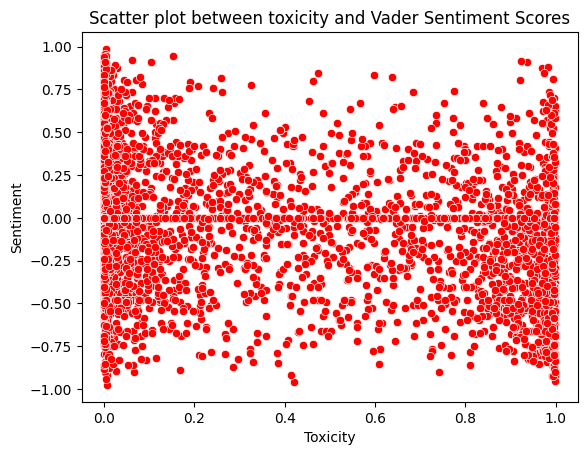

In [ ]:
# Now the following is definitely spurious
# Assuming df is your DataFrame and 'feature1' and 'feature2' are the names of your features
sns.scatterplot(x='toxicity', y='sentiment_scores', data=utterances_df, color='red')
plt.xlabel('Toxicity')
plt.ylabel('Sentiment')
plt.title('Scatter plot between toxicity and Vader Sentiment Scores')
plt.show()

In [ ]:
utterances_df[utterances_df["sentiment_scores"] <= -0.05]

,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,...,clean_text,hs_scores,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,id,sentiment_scores
id,,,,,,,,,,,,,,,,,,,,,
4dn8od,1459969443,"I love The Donald's pro-gun, concealed carry p...",armedMexican,None,4dn8od,6,None,1463526035,0,None,...,"I love The Donald's pro-gun, concealed carry p...","{'toxicity': 0.03581883, 'severe_toxicity': 0....",0.035819,0.000486,0.002289,0.000741,0.002495,0.009202,4dn8od,-0.247
4wophu,1470635626,I feel like this is a big enough deal where th...,[deleted],None,4wophu,0,None,1473026986,0,None,...,I feel like this is a big enough deal where th...,"{'toxicity': 0.39199406, 'severe_toxicity': 0....",0.391994,0.005703,0.450793,0.003018,0.053560,0.008881,4wophu,-0.155
4yf3wh,1471557959,Saw this on my Facebook feed:\n\nIvanka Trump ...,TomCuckington,None,4yf3wh,3,None,1473058731,0,None,...,Saw this on my Facebook feed: Ivanka Trump bou...,"{'toxicity': 0.0007454008, 'severe_toxicity': ...",0.000745,0.000113,0.000179,0.000116,0.000173,0.000142,4yf3wh,-0.205
60gsb1,1490019991,This is the summary of his talk which I will d...,jastonas,None,60gsb1,3,None,1492429916,0,None,...,This is the summary of his talk which I will d...,"{'toxicity': 0.00060229615, 'severe_toxicity':...",0.000602,0.000123,0.000184,0.000123,0.000174,0.000143,60gsb1,-0.087
60wbj0,1490206267,4:24 was revealed specifically to force Muhamm...,Okcupidissumb,None,60wbj0,3,None,1492437813,0,None,...,4:24 was revealed specifically to force Muhamm...,"{'toxicity': 0.063185886, 'severe_toxicity': 0...",0.063186,0.000936,0.007893,0.001354,0.003124,0.008992,60wbj0,-0.436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e8sdhqs,1540994001,racist,wyatt_terp,e8rqs1n,9suqws,-5,e8rqs1n,1541668337,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,racist,"{'toxicity': 0.6082027, 'severe_toxicity': 0.0...",0.608203,0.001953,0.004760,0.002311,0.016125,0.083633,e8sdhqs,-0.612
e8sedey,1540994818,Shut up bitch,Gay-_-Jesus,e8sdhqs,9suqws,4,e8rqs1n,1541668726,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,Shut up bitch,"{'toxicity': 0.9975083, 'severe_toxicity': 0.2...",0.997508,0.264750,0.980529,0.002639,0.966765,0.021669,e8sedey,-0.586
e8t48j8,1541015898,Nah man I'm just here for Childish Gambino. Do...,piratekingdan,9szdl2,9szdl2,6,e8t48j8,1541680838,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,Nah man I'm just here for Childish Gambino. Do...,"{'toxicity': 0.0041995253, 'severe_toxicity': ...",0.004200,0.000094,0.000327,0.000099,0.000361,0.000195,e8t48j8,-0.191


In [ ]:
# Bring the VADER sentiment scores to same scale as toxicity (from -1/+1 to 0/+1)
utterances_df["sentiment_scores"] = (utterances_df["sentiment_scores"] + 1) / 2

In [ ]:
utterances_df["sentiment_scores"].min()

0.01200000000000001

In [ ]:
# Now the following is definitely spurious
# Assuming df is your DataFrame and 'feature1' and 'feature2' are the names of your features
# sns.scatterplot(x='toxicity', y='sentiment_scores', data=corpus_sample_df, color='red')
# plt.xlabel('Toxicity')
# plt.ylabel('Sentiment')
# plt.title('Scatter plot between toxicity and sentiment')
# plt.show()

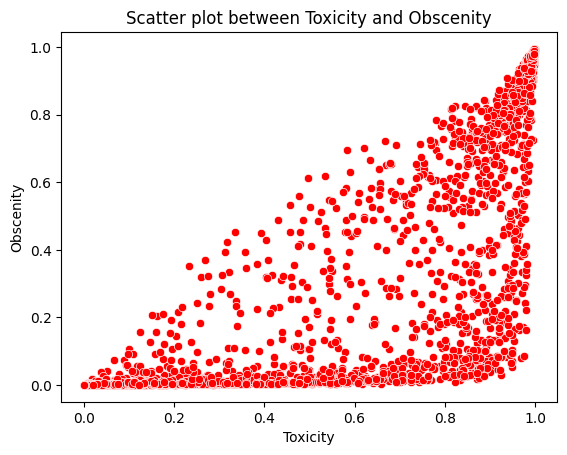

In [ ]:
# Now the following is definitely spurious
# Assuming df is your DataFrame and 'feature1' and 'feature2' are the names of your features
sns.scatterplot(x='toxicity', y='obscene', data=utterances_df, color='red')
plt.xlabel('Toxicity')
plt.ylabel('Obscenity')
plt.title('Scatter plot between Toxicity and Obscenity')
plt.show()

**Observations and Analysis**
- VADER usr krke percentage of positive, negative and neutral sentiment capture kro

In [ ]:
0.05+1

1.05

## Don't make any changes, just
  - -0.05+1

In [ ]:
# VADER scores <=-0.05 as negative sentiment, -0.05<score<=0.5 as neutral and >0.05 as positive sentiment
utterances_df["sentiment_category"] = utterances_df["sentiment_scores"]
utterances_df["sentiment_category"] = utterances_df["sentiment_category"].apply(lambda x: -1 if x <= 0.475 else 0)

In [ ]:
utterances_df["sentiment_category"].value_counts()

sentiment_category
 0    6014
-1    2242
Name: count, dtype: int64

**Observations**
- From here I can infer "hate speech" is imbalanced
- The analysis is almost always the same across different instances

In [ ]:
utterances_df.columns

Index(['user', 'root', 'reply_to', 'timestamp', 'text', 'clean_text',
       'hs_scores', 'toxicity', 'severe_toxicity', 'obscene', 'threat',
       'insult', 'identity_attack', 'sentiment_scores', 'sentiment_category'],
      dtype='object')

In [ ]:
utterances_df["sentiment_category"].value_counts()

sentiment_category
 0    6014
-1    2242
Name: count, dtype: int64

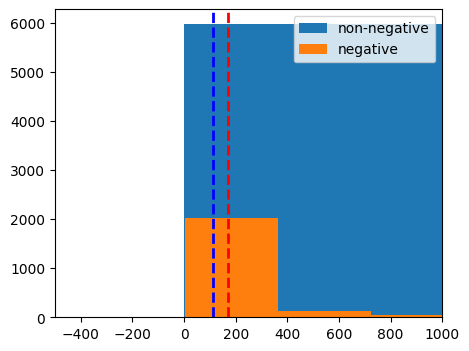

In [ ]:
# Character count as a feature
utterances_df["char_count"] = utterances_df["clean_text"].str.len()
plt.figure(figsize=(5, 4))
plt.hist(utterances_df[(utterances_df["sentiment_category"]==0)]["char_count"], bins=20, label="non-negative")
plt.hist(utterances_df[utterances_df["sentiment_category"]==-1]["char_count"], bins=20, label="negative")

plt.axvline(utterances_df[utterances_df['sentiment_category']==0]['char_count'].mean(), c='blue', lw=2, ls='--')
plt.axvline(utterances_df[utterances_df['sentiment_category']==-1]['char_count'].mean(), c='red', lw=2, ls='--')

max_xlim = 5000
plt.xlim(-500, 1000)
plt.legend()
plt.show()

(array([746.,  15.,  73., 152., 816., 427., 646., 840., 823., 617., 414.,
        210., 132.,  65.,  24.,   9.,   2.,   0.,   2.,   1.]),
 array([ 0.        ,  0.51428079,  1.02856158,  1.54284237,  2.05712316,
         2.57140395,  3.08568474,  3.59996553,  4.11424632,  4.62852711,
         5.1428079 ,  5.65708869,  6.17136948,  6.68565027,  7.19993106,
         7.71421185,  8.22849264,  8.74277343,  9.25705422,  9.77133501,
        10.2856158 ]),
 <BarContainer object of 20 artists>)

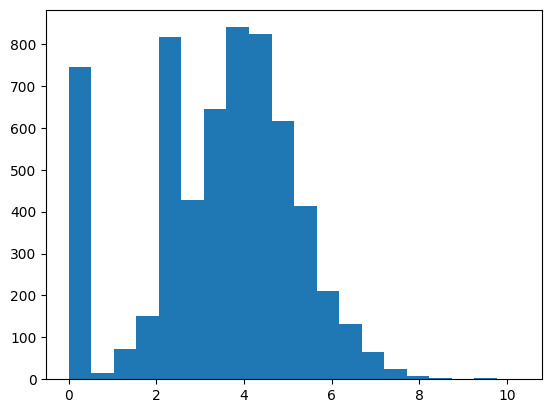

In [ ]:
plt.hist(np.log((utterances_df[utterances_df["sentiment_category"]==0]['char_count'])+1), bins=20, label='non-negative')

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


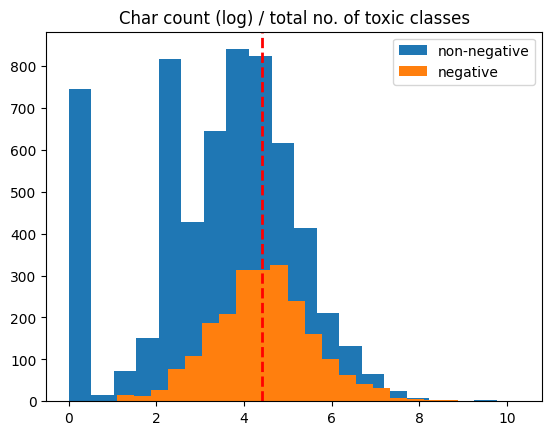

In [ ]:
plt.hist(np.log((utterances_df[utterances_df["sentiment_category"]==0]['char_count'])+1), bins=20, label='non-negative')
plt.hist(np.log((utterances_df[utterances_df['sentiment_category']==-1]['char_count'])+1), bins=20, label='negative')

plt.axvline(np.log(utterances_df[utterances_df['sentiment_category']==0]['char_count']).mean(),c='blue', lw=2, ls='--')
plt.axvline(np.log(utterances_df[utterances_df['sentiment_category']==-1]['char_count']).mean(),c='red', lw=2, ls='--')

plt.title('Char count (log) / total no. of toxic classes')

plt.legend()
plt.show()

Finally, just conduct the statistical test: correlation

In [ ]:
# Now, ek utterance object instantiate krne ke liye I need the following things (id, speaker, conversation_id, reply_to, timestamp, text)

In [ ]:
# Now drop all the unrequired feature columns
# hs_sample_df = hs_sample_df.drop(columns=[
#                                         "meta.score", "meta.top_level_comment", "meta.retrieved_on",
#                                         "meta.gilded", "meta.gildings", "meta.author_flair_text", "meta.stickied", "vectors"
#                                   ], axis=1)

In [ ]:
# annotation_df = utterances_df
# annotation_df["reply_to_text"] = annotation_df["clean_text"]
# for idx in annotation_df.index:
#   if annotation_df.loc[idx, "reply_to"] == 'None' or annotation_df.loc[idx, "reply_to"] == ''annotation_df.loc[idx, "reply_to_text"] = 'None'
#     annotation_df.loc[idx, "reply_to_text"] = annotation_df.loc[annotation_df.loc[idx, "reply_to"], "clean_text"]
#   else:
#     annotation_df.loc[idx, "reply_to_text"] = 'None'

In [ ]:
annotation_df = utterances_df
for idx in annotation_df.index:
  if annotation_df.loc[idx, "clean_text"] == '':
    annotation_df.loc[idx, "clean_text"] = "None"

In [ ]:
annotation_df["reply_to_text"] = annotation_df["clean_text"]
for idx in annotation_df.index:
  if annotation_df.loc[idx, "reply_to"] == "None":
    annotation_df.loc[idx, "reply_to_text"] = "None"
  else:
    annotation_df.loc[idx, "reply_to_text"] = annotation_df.loc[annotation_df.loc[idx, "reply_to"], "clean_text"]

In [ ]:
annotation_df[["clean_text", "reply_to_text"]]

,clean_text,reply_to_text
id,,
5ws6jn,None,None
5wst6q,None,None
5wzdvw,None,None
5wzvvl,None,None
5x021r,None,None
...,...,...
e1s8ufg,Lucky bastard I'd sprinkle her buns.,None
e1ymndf,[deleted],None
e263a2o,[deleted],None


In [ ]:
annot_data_sample = annotation_df.loc[annotation_df["conversation_id"].isin(expanded_conv_idx_lst[0:10])]
annot_data_sample

,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,...,hs_scores,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,sentiment_scores,sentiment_category,reply_to_text
id,,,,,,,,,,,,,,,,,,,,,
5ws6jn,1488332368,,CertifiedRabbi,None,5ws6jn,49,None,1489598845,0,None,...,"{'toxicity': 0.0019954417, 'severe_toxicity': ...",0.001995,0.000109,0.000238,0.000113,0.000245,0.000183,0.5000,0,None
5wst6q,1488339228,,JohnnyTruthSeed2,None,5wst6q,10,None,1489599157,0,None,...,"{'toxicity': 0.0019954417, 'severe_toxicity': ...",0.001995,0.000109,0.000238,0.000113,0.000245,0.000183,0.5000,0,None
5wzdvw,1488408733,,JohnnyTruthSeed2,None,5wzdvw,17,None,1492366194,0,None,...,"{'toxicity': 0.0019954417, 'severe_toxicity': ...",0.001995,0.000109,0.000238,0.000113,0.000245,0.000183,0.5000,0,None
5wzvvl,1488413893,,JohnnyTruthSeed2,None,5wzvvl,12,None,1492366462,0,None,...,"{'toxicity': 0.0019954417, 'severe_toxicity': ...",0.001995,0.000109,0.000238,0.000113,0.000245,0.000183,0.5000,0,None
5x021r,1488415784,,JohnnyTruthSeed2,None,5x021r,29,None,1492366547,0,None,...,"{'toxicity': 0.0019954417, 'severe_toxicity': ...",0.001995,0.000109,0.000238,0.000113,0.000245,0.000183,0.5000,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
defxkel,1488507844,I'll make a different post with my full result...,3D_Aryan_Waifu,defxin4,5x2jso,1,def67nj,1491161759,0,None,...,"{'toxicity': 0.00071283686, 'severe_toxicity':...",0.000713,0.000116,0.000182,0.000130,0.000170,0.000133,0.5000,0,"this is from 23andme, its under ur ancestry re..."
defy0w7,1488508477,Don't. That's your 100% identity there don't ...,17761488,defxkel,5x2jso,1,def67nj,1491162039,0,None,...,"{'toxicity': 0.029516669, 'severe_toxicity': 0...",0.029517,0.000111,0.000831,0.000370,0.000948,0.000327,0.4440,-1,I'll make a different post with my full result...
deg4a35,1488517443,why not lol the name is blurred out,3D_Aryan_Waifu,defy0w7,5x2jso,1,def67nj,1491166862,0,None,...,"{'toxicity': 0.0017805963, 'severe_toxicity': ...",0.001781,0.000091,0.000188,0.000093,0.000232,0.000158,0.3375,-1,Don't. That's your 100% identity there don't s...


In [ ]:
annot_data_sample[["clean_text", "reply_to_text"]]

,clean_text,reply_to_text
id,,
5ws6jn,None,None
5wst6q,None,None
5wzdvw,None,None
5wzvvl,None,None
5x021r,None,None
...,...,...
defxkel,I'll make a different post with my full result...,"this is from 23andme, its under ur ancestry re..."
defy0w7,Don't. That's your 100% identity there don't s...,I'll make a different post with my full result...
deg4a35,why not lol the name is blurred out,Don't. That's your 100% identity there don't s...


In [ ]:
len(annot_data_sample[annot_data_sample["reply_to_text"] != "None"])

49

In [ ]:
annot_data_sample[["clean_text", "reply_to_text"]].to_csv("/content/drive/MyDrive/572_project/annotation_data/pass_0_10.csv")

In [ ]:
utterances_df.to_csv("/content/drive/MyDrive/572_project/corpora/intermediate /donald_1000.csv")

In [ ]:
annot_data_sample

In [ ]:
utterances_df.to_csv("/content/drive/MyDrive/572_project/corpora/pass_1000.csv", index=False)

In upcoming iterations
- >= 5 and <= 10 iterations vaale hi corpora lena
- Remove conversations with starting speaker eliminated
- Jahan pe bot hai vo aur uske niche ke saare replies hta do
- Sbb ki conversation integrity check kro
- Agr koi empty comment hai, uska mujhe malum nai vahan kya aayega, I will just delete everything: agr mere paas timestamp hai toh main vo bhi extract krr skta huin  